# Importance of the Project
**The COVID-19 pandemic has caused significant disruption globally, and the situation continues to evolve. The analysis and prediction of COVID-19 spread are essential for effective public health policies and prevention strategies. This project aims to analyze COVID-19 data from various sources and develop models to predict the future spread of the virus.**

### Dataset Description
Dataset contails symptoms of patients which is crucial to identify the infection of covid. Columns are categorical in nature.
Details of the columns are :
*  ID (Individual ID)

* Sex (male/female). 

* Age ≥60 above years (true/false) 

* Test date (date when tested for COVID)

* Cough (true/false).

* Fever (true/false). 

* Sore throat (true/false). 
* Shortness of breath (true/false). 

* Headache (true/false). 
* Known contact with an individual confirmed to have COVID-19 (true/false).
* Corona positive or negative


In [1]:
# importing necessary libraries
import numpy
import pandas
import seaborn
import matplotlib.pyplot as plt

from sklearn.impute import KNNImputer

from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2

from sklearn.model_selection import train_test_split

from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.ensemble import AdaBoostClassifier

from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score, make_scorer, recall_score,precision_score,f1_score,roc_curve, auc, confusion_matrix


In [2]:
import warnings
warnings.filterwarnings('ignore')

In [7]:
# loading the dataset
covid = pandas.read_csv('corona_tested.csv')

In [8]:
covid.head()   # first 5 rows

,Ind_ID,Test_date,Cough_symptoms,Fever,Sore_throat,Shortness_of_breath,Headache,Corona,Age_60_above,Sex,Known_contact
0,1,11-03-2020,True,False,True,False,False,negative,NaN,NaN,Abroad
1,2,11-03-2020,False,True,False,False,False,positive,NaN,NaN,Abroad
2,3,11-03-2020,False,True,False,False,False,positive,NaN,NaN,Abroad
3,4,11-03-2020,True,False,False,False,False,negative,NaN,NaN,Abroad
4,5,11-03-2020,True,False,False,False,False,negative,NaN,NaN,Contact with confirmed


In [9]:
covid.tail()     # last 5 rows

,Ind_ID,Test_date,Cough_symptoms,Fever,Sore_throat,Shortness_of_breath,Headache,Corona,Age_60_above,Sex,Known_contact
278843,278844,30-04-2020,False,False,False,False,False,positive,NaN,male,Other
278844,278845,30-04-2020,False,False,False,False,False,negative,NaN,female,Other
278845,278846,30-04-2020,False,False,False,False,False,negative,NaN,male,Other
278846,278847,30-04-2020,False,False,False,False,False,negative,NaN,male,Other
278847,278848,30-04-2020,False,False,False,False,False,negative,NaN,female,Other


**covid symtoms have 'true' and 'True'. In english meaning is same but python interprets as different**

In [10]:
# defining a function to convert the data
def convert(x):
    if x=='TRUE':
        return 'true'
    elif x==True:
        return 'true'
    elif x=='FALSE' or x==False:
        return 'false'
    else:
        return x

In [11]:
# mapping the function

covid['Cough_symptoms'] = covid['Cough_symptoms'].map(convert)
covid['Fever'] = covid['Fever'].map(convert)
covid['Sore_throat'] = covid['Sore_throat'].map(convert)
covid['Shortness_of_breath'] = covid['Shortness_of_breath'].map(convert)
covid['Headache'] = covid['Headache'].map(convert)

In [12]:
# renaming a column
covid.rename(columns={'Sex':'Gender'},inplace=True)

In [13]:
covid.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 278848 entries, 0 to 278847
Data columns (total 11 columns):
 #   Column               Non-Null Count   Dtype 
---  ------               --------------   ----- 
 0   Ind_ID               278848 non-null  int64 
 1   Test_date            278848 non-null  object
 2   Cough_symptoms       278596 non-null  object
 3   Fever                278596 non-null  object
 4   Sore_throat          278847 non-null  object
 5   Shortness_of_breath  278847 non-null  object
 6   Headache             278847 non-null  object
 7   Corona               278848 non-null  object
 8   Age_60_above         151528 non-null  object
 9   Gender               259285 non-null  object
 10  Known_contact        278848 non-null  object
dtypes: int64(1), object(10)
memory usage: 23.4+ MB


**In the dataset the value 'None' should be replaced with NaN**

In [14]:
covid.replace({'None':numpy.nan},inplace=True)

In [15]:
# Finding the total null values
covid.isnull().sum()

Ind_ID                      0
Test_date                   0
Cough_symptoms            252
Fever                     252
Sore_throat                 1
Shortness_of_breath         1
Headache                    1
Corona                      0
Age_60_above           127320
Gender                  19563
Known_contact               0
dtype: int64

In [16]:
for i in covid.columns:
    print(f"{i} has",round(covid[i].isnull().sum()*100/covid.shape[0],5),"%")

Ind_ID has 0.0 %
Test_date has 0.0 %
Cough_symptoms has 0.09037 %
Fever has 0.09037 %
Sore_throat has 0.00036 %
Shortness_of_breath has 0.00036 %
Headache has 0.00036 %
Corona has 0.0 %
Age_60_above has 45.65928 %
Gender has 7.01565 %
Known_contact has 0.0 %


In [17]:
# dropping nan rows for columns having less than 1% nan
covid.dropna(subset=['Cough_symptoms','Fever','Sore_throat','Shortness_of_breath','Headache'],axis=0,inplace=True)

In [18]:
# drop age_60_above column 
covid.drop('Age_60_above',axis=1,inplace=True)

In [19]:
covid.replace({'other':numpy.nan},inplace=True)

In [20]:

covid.dropna(subset=['Corona'],axis=0,inplace=True)

In [21]:
# converting the datatype as categorical
for i in covid.columns:
    if i=='Ind_ID' or i == 'Test_date' or i == 'Test_date':
        pass
    else:
        covid[i] = covid[i].astype('category')

In [22]:
covid.info()

<class 'pandas.core.frame.DataFrame'>
Index: 274702 entries, 0 to 278847
Data columns (total 10 columns):
 #   Column               Non-Null Count   Dtype   
---  ------               --------------   -----   
 0   Ind_ID               274702 non-null  int64   
 1   Test_date            274702 non-null  object  
 2   Cough_symptoms       274702 non-null  category
 3   Fever                274702 non-null  category
 4   Sore_throat          274702 non-null  category
 5   Shortness_of_breath  274702 non-null  category
 6   Headache             274702 non-null  category
 7   Corona               274702 non-null  category
 8   Gender               255668 non-null  category
 9   Known_contact        274702 non-null  category
dtypes: category(8), int64(1), object(1)
memory usage: 8.4+ MB


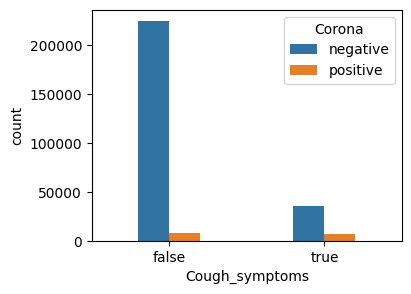

In [23]:
#univatiate analysis

plt.figure(figsize=(4,3))
seaborn.countplot(x='Cough_symptoms',hue='Corona',data=covid,width=0.4)
plt.show()


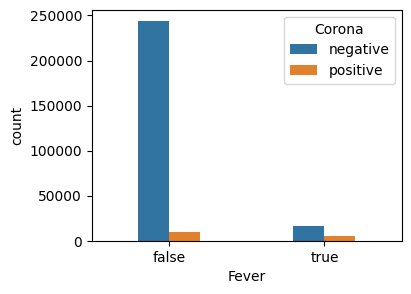

In [24]:
plt.figure(figsize=(4,3))
seaborn.countplot(x='Fever',hue='Corona',data=covid,width=0.4)
plt.show()


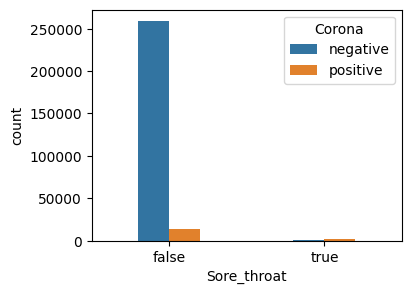

In [25]:
plt.figure(figsize=(4,3))
seaborn.countplot(x='Sore_throat',hue='Corona',data=covid,width=0.4)
plt.show()


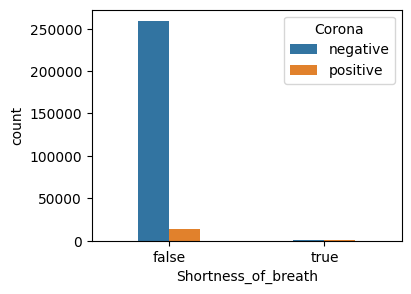

In [26]:
plt.figure(figsize=(4,3))
seaborn.countplot(x='Shortness_of_breath',hue='Corona',data=covid,width=0.4)
plt.show()


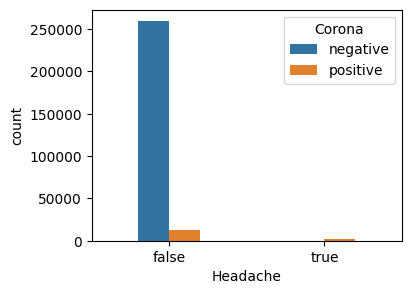

In [27]:
plt.figure(figsize=(4,3))
seaborn.countplot(x='Headache',hue='Corona',data=covid,width=0.4)
plt.show()


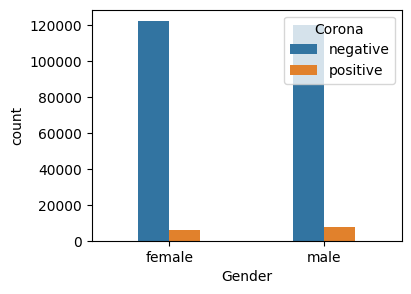

In [28]:
plt.figure(figsize=(4,3))
seaborn.countplot(x='Gender',hue='Corona',data=covid,width=0.4)
plt.show()


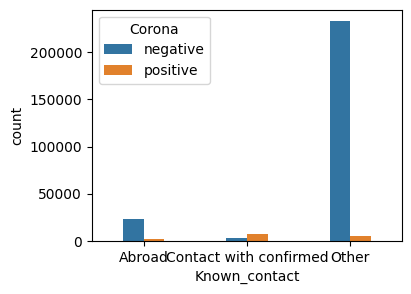

In [29]:
plt.figure(figsize=(4,3))
seaborn.countplot(x='Known_contact',hue='Corona',data=covid,width=0.4)
plt.show()


In [30]:
covid.isnull().sum()

Ind_ID                     0
Test_date                  0
Cough_symptoms             0
Fever                      0
Sore_throat                0
Shortness_of_breath        0
Headache                   0
Corona                     0
Gender                 19034
Known_contact              0
dtype: int64

In [31]:
covid_data=covid.copy(deep=True)

## Encoding

In [32]:
# Encoding
covid_data['Cough_symptoms']=pandas.get_dummies(covid_data['Cough_symptoms'],drop_first=True)
covid_data['Fever']=pandas.get_dummies(covid_data['Fever'],drop_first=True)
covid_data['Sore_throat']=pandas.get_dummies(covid_data['Sore_throat'],drop_first=True)
covid_data['Shortness_of_breath']=pandas.get_dummies(covid_data['Shortness_of_breath'],drop_first=True)
covid_data['Headache']=pandas.get_dummies(covid_data['Headache'],drop_first=True)
covid_data['Corona']=pandas.get_dummies(covid_data['Corona'],drop_first=True)

In [33]:
covid_data['Gender'].replace({'male':0,'female':1},inplace=True)
covid_data['Known_contact'].replace({'Other':2,'Contact with confirmed':1,'Abroad':0},inplace=True)

In [34]:
covid_data.isnull().sum()

Ind_ID                     0
Test_date                  0
Cough_symptoms             0
Fever                      0
Sore_throat                0
Shortness_of_breath        0
Headache                   0
Corona                     0
Gender                 19034
Known_contact              0
dtype: int64

## Imputation

In [35]:
imputed_data = covid_data.copy(deep=True)

In [36]:
# applying KNN imputation
knn=KNNImputer(n_neighbors=5,weights='uniform')
columns=['Cough_symptoms', 'Fever', 'Sore_throat','Shortness_of_breath', 'Headache','Gender','Known_contact']
imputed=knn.fit_transform(covid_data[columns])

In [37]:
df=pandas.DataFrame(imputed,columns=columns)

In [38]:
def change(x):
    if x>0.5:
        return 1
    elif x<0.5:
        return 0
    else:
        return x

In [39]:
df['Gender'] = df['Gender'].apply(change)

In [40]:
imputed_data['Gender'].iloc[:] =df['Gender']

In [41]:
imputed_data.head()

,Ind_ID,Test_date,Cough_symptoms,Fever,Sore_throat,Shortness_of_breath,Headache,Corona,Gender,Known_contact
0,1,11-03-2020,True,False,True,False,False,False,1,0
1,2,11-03-2020,False,True,False,False,False,True,0,0
2,3,11-03-2020,False,True,False,False,False,True,0,0
3,4,11-03-2020,True,False,False,False,False,False,1,0
4,5,11-03-2020,True,False,False,False,False,False,1,1


In [42]:
imputed_data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 274702 entries, 0 to 278847
Data columns (total 10 columns):
 #   Column               Non-Null Count   Dtype   
---  ------               --------------   -----   
 0   Ind_ID               274702 non-null  int64   
 1   Test_date            274702 non-null  object  
 2   Cough_symptoms       274702 non-null  bool    
 3   Fever                274702 non-null  bool    
 4   Sore_throat          274702 non-null  bool    
 5   Shortness_of_breath  274702 non-null  bool    
 6   Headache             274702 non-null  bool    
 7   Corona               274702 non-null  bool    
 8   Gender               274702 non-null  category
 9   Known_contact        274702 non-null  category
dtypes: bool(6), category(2), int64(1), object(1)
memory usage: 8.4+ MB


In [43]:
imputed_data['Gender'] = imputed_data['Gender'].astype('uint8') 

In [44]:
final_data = imputed_data.astype('category')

In [45]:
final_data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 274702 entries, 0 to 278847
Data columns (total 10 columns):
 #   Column               Non-Null Count   Dtype   
---  ------               --------------   -----   
 0   Ind_ID               274702 non-null  category
 1   Test_date            274702 non-null  category
 2   Cough_symptoms       274702 non-null  category
 3   Fever                274702 non-null  category
 4   Sore_throat          274702 non-null  category
 5   Shortness_of_breath  274702 non-null  category
 6   Headache             274702 non-null  category
 7   Corona               274702 non-null  category
 8   Gender               274702 non-null  category
 9   Known_contact        274702 non-null  category
dtypes: category(10)
memory usage: 15.7 MB


# Feature Engineering


In [46]:
# separating features and target
features = final_data.drop(['Ind_ID','Test_date','Corona'],axis=1)
target = final_data['Corona']

In [58]:
target

0         False
1          True
2          True
3         False
4         False
          ...  
278843     True
278844    False
278845    False
278846    False
278847    False
Name: Corona, Length: 274702, dtype: category
Categories (2, bool): [False, True]

In [59]:
# chi2 method to select important k best features

selector = SelectKBest(score_func=chi2, k=6)
X_new = selector.fit_transform(features, target)

idxs_selected = selector.get_support(indices=True)

feat_names = features.columns[idxs_selected]

print(feat_names)

Index(['Cough_symptoms', 'Fever', 'Sore_throat', 'Shortness_of_breath',
       'Headache', 'Known_contact'],
      dtype='object')


**covid symptoms are the important features of the dataset**

In [48]:
# splitting train test set
x_train,x_test,y_train,y_test = train_test_split(features,target,test_size=0.3,random_state=42)

In [49]:
y_test.value_counts()

Corona
False    78054
True      4357
Name: count, dtype: int64

In [50]:
y_train.value_counts()

Corona
False    181954
True      10337
Name: count, dtype: int64

**1. random forest classifier**

In [51]:
rf=RandomForestClassifier()
rf.fit(x_train,y_train)

RandomForestClassifier()

In [52]:
pred_rf = rf.predict(x_test)

# accuracy score
accuracy_rf = accuracy_score(y_test, pred_rf)
print("Accuracy:", accuracy_rf*100)

Accuracy: 96.80261130188931


##### Parametre tuning for random forest

In [53]:
rfc = RandomForestClassifier(random_state=42)

param_grid = {'n_estimators': [50, 100, 200],
              'max_depth': [5, 10, 15, 20, None],
              'max_features': ['sqrt', 'log2'],
              'bootstrap': [True, False]}


scorer = make_scorer(accuracy_score)

grid_obj = GridSearchCV(rfc, param_grid, scoring=scorer)
grid_fit = grid_obj.fit(x_train, y_train)

KeyboardInterrupt: 

In [51]:
# Get the best hyperparameters
best_params = grid_fit.best_params_
best_params

{'bootstrap': True,
 'max_depth': 10,
 'max_features': 'sqrt',
 'n_estimators': 50}

In [52]:
# Training the model using the best hyperparameters
rfc_best = RandomForestClassifier(random_state=42, **best_params)
rfc_best.fit(x_train, y_train)
y_pred_rf = rfc_best.predict(x_test)

In [53]:
# Evaluate the best model
accuracy_rf = accuracy_score(y_test, y_pred_rf)
print("Accuracy: {:.10f}%".format(accuracy_rf * 100.0))


Accuracy: 96.8026113019%


##### performance measures for random forest


In [54]:
# confusion matrix
cm_rf = confusion_matrix(y_test, y_pred_rf)
print("Confusion Matrix:\n", cm_rf)

# precision
prec_rf = cm_rf[0][0]*100/(cm_rf[0][0] + cm_rf[0][1])
print("Precision:", prec_rf)

# recall
recall_rf = cm_rf[0][0]*100/(cm_rf[0][0] + cm_rf[1][0])
print('recall :',recall_rf)

# F-1 Score
f1_rf=2*prec_rf*recall_rf/(recall_rf + prec_rf)
print("F1 Score:", f1_rf)

# False Negative Score
fnr_rf = cm_rf[1][0]*100/(cm_rf[0][0] + cm_rf[1][0])
print('False Negative rate : ',fnr_rf)

Confusion Matrix:
 [[77422   632]
 [ 2003  2354]]
Precision: 99.19030414841008
recall : 97.47812401636764
F1 Score: 98.3267610284546
False Negative rate :  2.5218759836323574


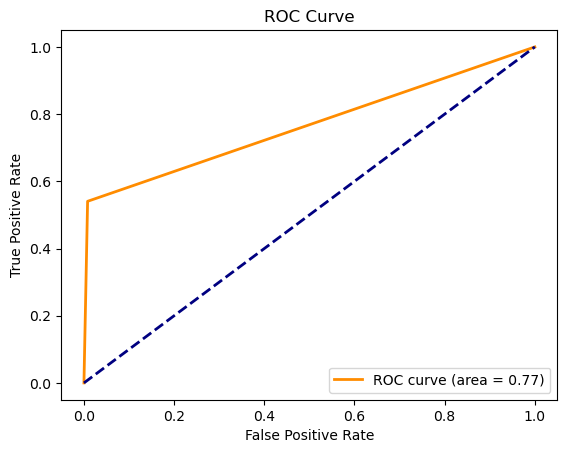

In [55]:
# AUC ROC curve
fpr, tpr, thresholds = roc_curve(y_test, pred_rf)
roc_auc = auc(fpr, tpr)
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend(loc="lower right")
plt.show()


**2. Decision Tree Classifier**

In [54]:
dt = DecisionTreeClassifier()

dt.fit(x_train, y_train)

DecisionTreeClassifier()

In [55]:
y_pred = dt.predict(x_test)

accuracy = accuracy_score(y_test, y_pred)
print('Accuracy:', accuracy*100)

Accuracy: 96.7965441506595


**Parameter tuning for Decision tree model**

In [56]:
dtc = DecisionTreeClassifier(random_state=42)

param_grid = {
    'max_depth': [3, 5, 7, 9],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

scorer = make_scorer(accuracy_score)

grid = GridSearchCV(dtc, param_grid=param_grid, scoring=scorer, cv=5)
grid.fit(x_train, y_train)

print('Best parameters:', grid.best_params_)

Best parameters: {'max_depth': 7, 'min_samples_leaf': 4, 'min_samples_split': 2}


In [59]:
dtc_best = DecisionTreeClassifier(max_depth = 7, min_samples_leaf = 4, min_samples_split = 10)
dtc_best.fit(x_train,y_train)

DecisionTreeClassifier(max_depth=7, min_samples_leaf=4, min_samples_split=10)

In [60]:
y_dt = dtc_best.predict(x_test)

accuracy_dtc = accuracy_score(y_test, y_dt)
print('Test accuracy:', accuracy_dtc*100)


Test accuracy: 96.79775758090547


**Performance measures for Decision Tree Classifier**

In [61]:
# confusion matrix
cm_dt = confusion_matrix(y_test, y_dt)
print("Confusion Matrix:\n", cm_dt)

# precision
prec_dt = cm_dt[0][0]*100/(cm_dt[0][0] + cm_dt[0][1])
print("Precision:", prec_dt)

# recall
recall_dt = cm_dt[0][0]*100/(cm_dt[0][0] + cm_dt[1][0])
print('recall :',recall_dt)

# F-1 Score
f1_dt=2*prec_dt*recall_dt/(recall_dt + prec_dt)
print("F1 Score:", f1_dt)

# False Negative Score
fnr_dt = cm_dt[1][0]*100/(cm_dt[0][0] + cm_dt[1][0])
print('False Negative rate : ',fnr_dt)

Confusion Matrix:
 [[77416   638]
 [ 2001  2356]]
Precision: 99.18261716247726
recall : 97.48038832995455
F1 Score: 98.32413587263686
False Negative rate :  2.5196116700454563


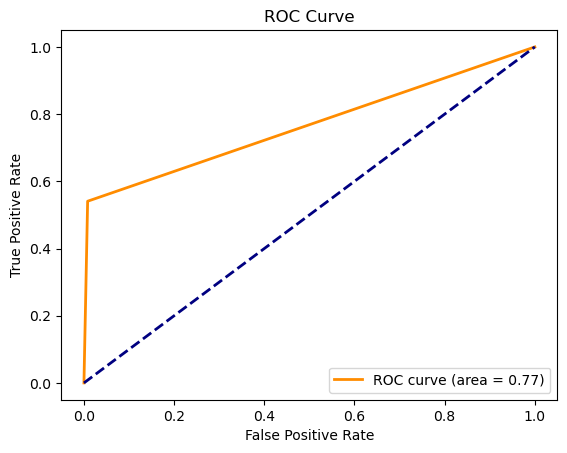

In [62]:
# AUC ROC curve
fpr, tpr, thresholds = roc_curve(y_test, y_dt)
roc_auc = auc(fpr, tpr)
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend(loc="lower right")
plt.show()


**3. Naive Bias Classifier**

In [63]:

nb = GaussianNB()

nb.fit(x_train, y_train)

y_pred_nb = nb.predict(x_test)


In [64]:
accuracy_nb = accuracy_score(y_test, y_pred_nb)
accuracy_nb

0.9378845057091894

**As naive bias model giving poor accuracy so tuning may not be required**

**4. Adaboost classifier**

In [65]:
adaboost = AdaBoostClassifier()
adaboost.fit(x_train,y_train)
y_pred_ada=adaboost.predict(x_test)
accuracy_ada =  accuracy_score(y_test, y_pred_ada)
accuracy_ada

0.9583429396561138

**Parameter tuning for adaboost model**

In [66]:
adaboost_params = {'n_estimators': [50, 100, 200],
                   'learning_rate': [0.1, 0.01, 0.001]}

adaboost_grid = GridSearchCV(adaboost, adaboost_params, cv=5)
adaboost_grid.fit(x_train, y_train)

print("Best Hyperparameters for AdaBoost: ", adaboost_grid.best_params_)

Best Hyperparameters for AdaBoost:  {'learning_rate': 0.1, 'n_estimators': 200}


In [67]:
adaboost = AdaBoostClassifier(learning_rate= 0.1, n_estimators=200)
adaboost.fit(x_train,y_train)
y_pred_ada=adaboost.predict(x_test)
accuracy_ada =  accuracy_score(y_test, y_pred_ada)
accuracy_ada

0.958694834427443

**Performance measures of Adaboost model**

In [68]:
# confusion matrix
cm_ada = confusion_matrix(y_test, y_pred_ada)
print("Confusion Matrix:\n", cm_ada)

# precision
prec_ada = cm_ada[0][0]*100/(cm_ada[0][0] + cm_ada[0][1])
print("Precision:", prec_ada)

# recall
recall_ada = cm_ada[0][0]*100/(cm_ada[0][0] + cm_ada[1][0])
print('recall :',recall_rf)

# F-1 Score
f1_ada=2*prec_ada*recall_ada/(recall_ada + prec_ada)
print("F1 Score:", f1_rf)

# False Negative Score
fnr_ada = cm_ada[1][0]*100/(cm_ada[0][0] + cm_ada[1][0])
print('False Negative rate : ',fnr_ada)

Confusion Matrix:
 [[77507   547]
 [ 2857  1500]]
Precision: 99.29920311579163
recall : 97.47812401636764
F1 Score: 98.3267610284546
False Negative rate :  3.5550744114280026


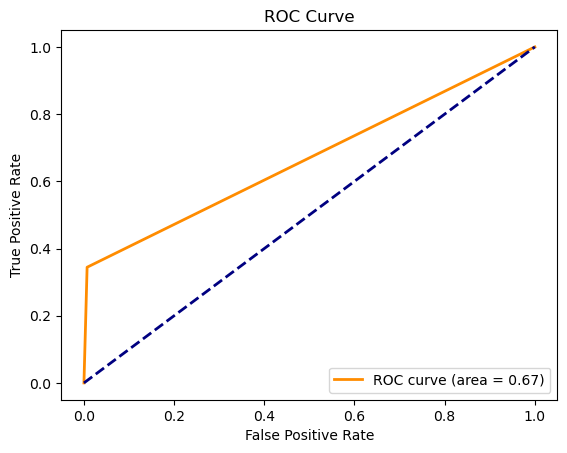

In [69]:
# AUC ROC curve
fpr, tpr, thresholds = roc_curve(y_test, y_pred_ada)
roc_auc = auc(fpr, tpr)
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend(loc="lower right")
plt.show()


**5. Support Vector Machine Classifier**

In [70]:
svc = SVC()
svc.fit(x_train,y_train)

SVC()

In [71]:
pred_svc=svc.predict(x_test)
acc_svc=accuracy_score(pred_svc,y_test)
acc_svc*100

96.80261130188931

In [72]:
# confusion matrix
cm_svc = confusion_matrix(y_test, pred_svc)
print("Confusion Matrix:\n", cm_svc)

# precision
prec_svc = cm_svc[0][0]*100/(cm_svc[0][0] + cm_svc[0][1])
print("Precision:", prec_svc)

# recall
recall_svc = cm_svc[0][0]*100/(cm_svc[0][0] + cm_svc[1][0])
print('recall :',recall_svc)

# F-1 Score
f1_svc = 2*prec_svc*recall_svc/(recall_svc + prec_svc)
print("F1 Score:", f1_svc)

# False Negative Score
fnr_svc = cm_svc[1][0]*100/(cm_svc[0][0] + cm_svc[1][0])
print('False Negative rate : ',fnr_svc)

Confusion Matrix:
 [[77405   649]
 [ 1986  2371]]
Precision: 99.16852435493377
recall : 97.49845700394252
F1 Score: 98.32639969513164
False Negative rate :  2.5015429960574878


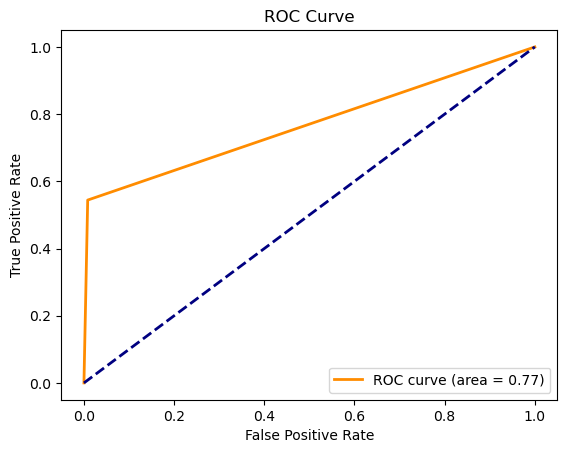

In [73]:
# AUC ROC curve
fpr, tpr, thresholds = roc_curve(y_test, pred_svc)
roc_auc = auc(fpr, tpr)
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend(loc="lower right")
plt.show()


In [74]:
df = pandas.DataFrame({'random forest':[accuracy_rf*100,prec_rf,recall_rf,f1_rf,fnr_rf,0.79],
                      'naive bayes':[accuracy_nb*100,'nan','nan','nan','nan','nan'],
                      'Adaboost':[accuracy_ada*100,prec_ada,recall_ada,f1_ada,fnr_ada,0.67],
                      'Decision Tree':[accuracy_dtc*100,prec_dt,recall_dt,f1_dt,fnr_dt,0.77],
                       'SVC':[acc_svc*100,prec_svc,recall_svc,f1_svc,fnr_svc,0.77]
                      },index=['Accuracy','Precision','Recall','F-1 Score','False Negative Rate', 'ROC curve area'])
df

,random forest,naive bayes,Adaboost,Decision Tree,SVC
Accuracy,96.802611,93.788451,95.869483,96.797758,96.802611
Precision,99.190304,nan,99.299203,99.182617,99.168524
Recall,97.478124,nan,96.444926,97.480388,97.498457
F-1 Score,98.326761,nan,97.851254,98.324136,98.326400
False Negative Rate,2.521876,nan,3.555074,2.519612,2.501543
ROC curve area,0.790000,nan,0.670000,0.770000,0.770000


**Random forest model we will prefer in this case as FNR is lowe as well as ROC area is more.**